In [1]:
#import module (library)

import pandas as pd
import pycaret
import numpy as np
import math
import matplotlib.pyplot as plt
from pycaret.regression import *

from pycaret.regression import load_model

import plotly.io as pio
pio.renderers.default = 'iframe_connected'

import time
import datetime

# import module (user defined function)

from py_module.load_data import load_data
from py_module.plot_data import plot_histogram
from py_module.regression import *
from py_module.pre_processing import *
from py_module.verify import *
from py_module.etc import *
from py_module.compare import *

In [2]:
# === initial setting ===

parameter = "Llt" # target parameter

In [16]:
# === import raw_data (from csv file) ===

# csv format 시뮬레이션 데이터로부터 데이터 import

## - opt
# pp : outlier data 제거 여부, 제거시 1 설정 (default : None)
# size_en : 데이터 잘라내기 활성화 (default : False)
# size : 데이터 크기 (default : 100000)

filename = "./Data_2021_10_14_v1 (N98923)/Data.csv" # csv file directory and name

raw_data = load_data(fn=filename, pp=1, size_en=False, size=10000)

raw_data.isnull().sum()

N1               0
N2               0
d1               0
d2               0
freq             0
move_tx          0
move_rx          0
offset_tx        0
offset_rx        0
per              0
space1           0
space2           0
space3           0
space4           0
l1               0
l2               0
h1               0
w1               0
Lmt              0
Lmr              0
Llt              0
Llr              0
k                0
Lt               0
Lr               0
Lm               0
Rt               0
Rr               0
I1               0
I2               0
Zt               0
Zr               0
Zm               0
copperloss_tx    0
copperloss_rx    0
R1               0
R2               0
dtype: int64

In [4]:
# === dataset pre-processing ===

# import한 raw_data를 pre-processing 해주는 작업

# 1. drop output data except for target output
# 학습을 원하는 parameter만 남기고 나머지 output 제거

processed_data = drop_output(raw_data, parameter)



# 2. cut data
# outlier 제거를 위해 데이터를 지정한 범위 내의 값만 남김 (위의 plot data 프로세스 결과를 참조하여 범위 지정)

## - opt
# lo : lower bound value (default : -inf)
# hi : upper bound value (default : inf)

processed_data = cut_data(processed_data, parameter=parameter, lo=0.1, hi=40)



# 3. add feature
# 기존에 존재하는 input parameter들을 이용해서 물리적인 의미를 갖는 새로운 파라미터를 만들어 낼 시 모델의 성능을 증가시킬 수 있음
# ex> 변압기 자화 인덕턴스는 턴수의 제곱에 비례하므로 턴수의 제곱에 해당하는 파라미터를 새로 만들어 자화인덕터 regression 모델을 만들 경우 모델 성능 증가

new_feature_names = []

processed_data = add_feature(processed_data, parameter=parameter, new_feature_names = new_feature_names)


# 학습에 사용할 최종 데이터
processed_data



# TO DO LIST
# normalize 추가


,N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1,Llt
0,8,8,6.0,9.7,49000.0,2,5,7,-9,1480,1,23,3,55,19,41,166,24,6.704324
1,8,8,11.7,10.7,49000.0,6,4,18,-5,1160,5,47,3,31,31,72,251,248,13.703235
2,8,8,9.0,5.4,49000.0,4,1,9,-18,4192,5,31,7,28,33,40,191,212,19.559244
3,8,8,9.5,4.2,49000.0,6,3,14,-7,3419,1,21,6,38,15,30,185,221,16.173505
4,11,11,7.5,10.3,58000.0,1,2,13,-17,4445,7,50,6,46,16,69,207,241,35.181363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97610,9,9,8.4,9.2,42000.0,7,2,8,-14,2483,9,59,9,35,30,71,235,105,14.449801
97611,5,5,11.4,8.9,25000.0,3,4,12,-6,1838,2,50,3,47,23,62,161,118,7.164551
97612,5,5,8.6,9.6,25000.0,2,2,17,-2,4913,1,21,3,35,29,51,110,80,3.697227
97613,5,5,11.0,3.6,25000.0,1,7,18,-12,4437,1,33,4,31,26,59,131,170,8.532143


In [5]:

[model, data_seen, data_unseen] = regression_basic(processed_data, parameter, frac_ratio=0.9, save_en=False, save_model_name="model", new_feature_names=new_feature_names, algorithm="lightgbm", num_iterations=100000)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.3968,0.3415,0.5844,0.9935,0.0417,0.0351
1,0.4070,0.3530,0.5941,0.9933,0.0402,0.0342
2,0.4000,0.3442,0.5867,0.9937,0.0402,0.0342
3,0.4030,0.4141,0.6435,0.9919,0.0433,0.0350
4,0.4041,0.3497,0.5913,0.9933,0.0402,0.0340
5,0.4070,0.3850,0.6205,0.9926,0.0416,0.0347
6,0.3975,0.3566,0.5972,0.9933,0.0422,0.0345
7,0.3934,0.3113,0.5579,0.9940,0.0400,0.0340
8,0.4004,0.4663,0.6828,0.9911,0.0470,0.0353
9,0.3987,0.3876,0.6226,0.9929,0.0424,0.0347


KeyboardInterrupt: 

array([0.99803622, 0.14027637, 0.10574562, 0.32518552, 1.22518585])

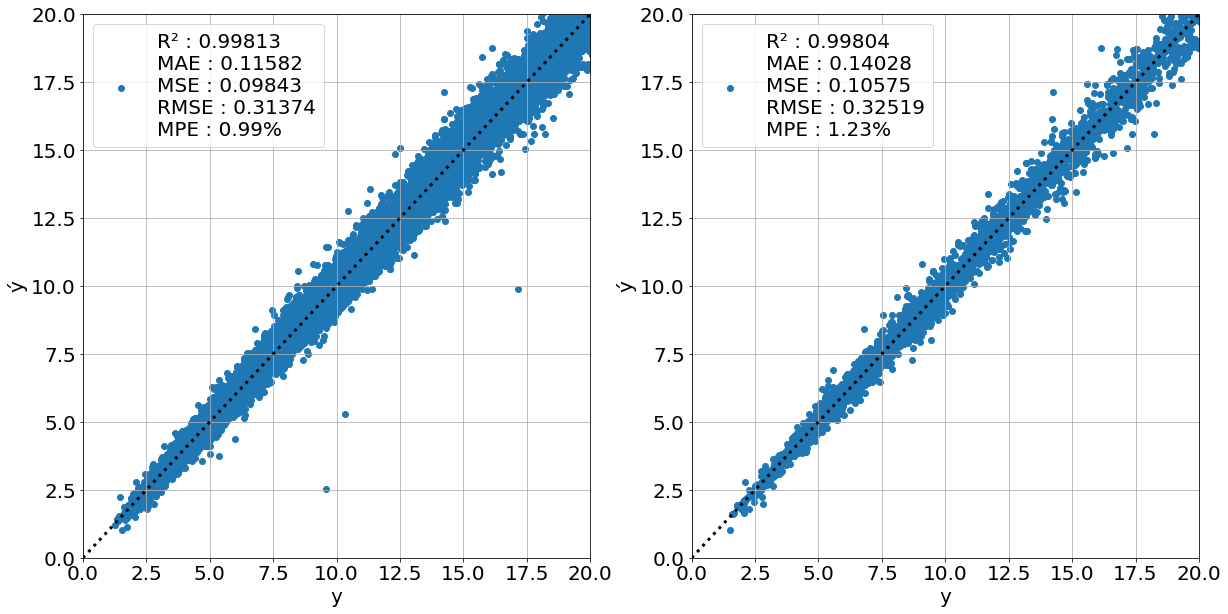

In [12]:
verify_plot(model, data_seen, data_unseen, parameter, xlim=[0,20], ylim=[0,20], legend=True)